## This notebook contains architecture of keras model VGG16

* I am using Dogs vs Cats [Kaggle dataset](https://www.kaggle.com/competitions/dogs-vs-cats/data)

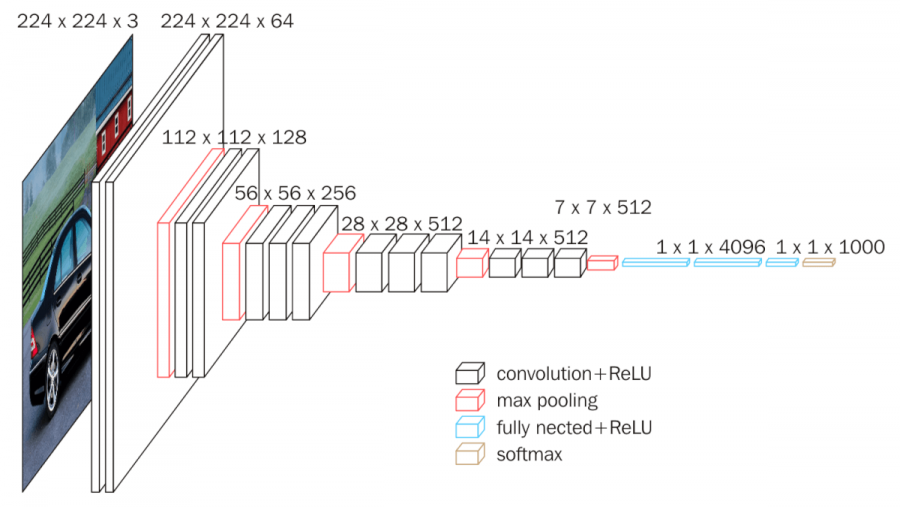

- This is the architecture of VGG16

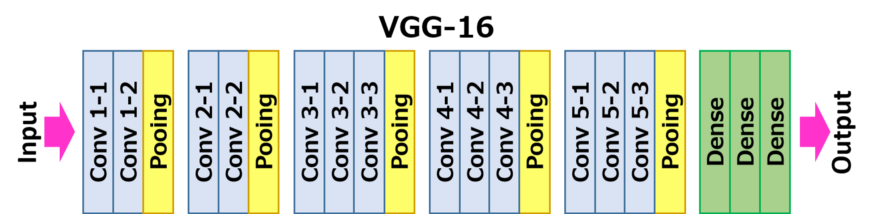

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import keras
import os

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from PIL import Image
import glob

### Reading dataset

In [ ]:
trainingset = glob.glob("D:/Is-the-road-safe-/Implementing-VGG/train/*")

In [ ]:
trainingset[0].split("\\")[1].split(".")[0]

In [ ]:
len(trainingset)

In [ ]:
X_train = np.zeros((len(trainingset) , 224, 224, 3))

In [ ]:
Y_train = []


for i, fl in enumerate(trainingset):
    im = Image.open(fl)
    arr = np.array(im.resize((224,224)))
    X_train[i] = arr
    Y_train.append(fl.split("\\")[1].split(".")[0])

In [ ]:
X_train[0]

In [ ]:
X_train = X_train/255

In [ ]:
Y_train

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
Y_train = lb.fit_transform(Y_train)

In [ ]:
X_train[0].shape

### Implementing VGG16 from scratch

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.001),
loss=keras.losses.categorical_crossentropy,
metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, Y_train, epochs = 10, validation_split =0.1)

In [ ]:
testset = glob.glob("D:/Is-the-road-safe-/Implementing-VGG/test/*")

In [ ]:
X_test = np.zeros((len(testset) , 224, 224, 3))

In [ ]:
Y_test = []


for i, fl in enumerate(testset):
    im = Image.open(fl)
    arr = np.array(im.resize((224,224)))
    X_test[i] = arr
    Y_test.append(fl.split("\\")[1].split(".")[0])

In [ ]:
len(X_test)

In [ ]:
Y_test = lb.fit_transform(Y_test)

In [ ]:
Y_test

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred